# Project 01

## Introduction
___
### Random Graphs

One popular topic of study in graph theory applied to social networks is that of processes for generating random graphs, where the edges in the graph are added according to some kind of stochastic(randomized) algorithm. One of the reasons researchers are interested in random graph models is that real social networks can be pretty hard to obtain, and even if you could get your hands on something like facebook’s friend graph (hint: Facebook doesn’t let most people look at that), it would be so full of real human details that actually studying it would be problematic from an ethics and privacy standpoint. so researchers would like to come up with ways to generate synthetic networks which “look like” real human networks; they want these synthetic networks to be randomized so that they can make many of them and simulate various social processes on them. Unfortunately, generating random networks that “look like” real social networks turns out to be surprisingly hard to do. In this project, you’ll experiment with a simple random graph model. This will give you hands-on experience in thinking about how to ask this course’s style of questions using code.

The world’s simplest random graph model: There are nvertices, and each edge exists with probability p. In this model, to generate a random graph, you first need to choose 2 parameters: 

    • $n$: the number of nodes, and

    • $p$: the probability that each edge exists.

Once you have selected nand p, the process is very simple: you iterate through all the possible edges. For each possible edge (i.e., each pair of vertices), add an edge with probability p, and don’t add an edge with probability 1 −p. You can think of this as flipping a coin that comes up “heads” a pfraction of the time, and comes up “tails” a 1 −pfraction of the time. For each possible edge, you flip the coin — if it comes up heads, you draw the edge. Otherwise you move on to the next one.

What kinds of graphs does this model create? That’s your job to explore! On the extreme ends, it’s hopefully obvious that if p= 0, you get an empty graph (no edges at all); if p= 1, you geta complete graph (all possible edges exist). In between those endpoints, bigger values of pshould create a more connected graph.

## Assignment 01
___

1) Implement this random graph model in code. You may use any system you like as long as the above idea is implemented faithfully. If you want to provide examples visually to show that your code works (using a visualization tool like NetworkX), clearly state what values of $n$ and $p$ your examples are using.

#### Delieverable 1:

The code for your random graph model. If you give visual examples of graphs created by your algorithm, please annotate them clearly with values of $n$ and $p$.
___

In [6]:
# Import libraries
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import datetime, time, os, random, copy
 

In [7]:
class Graph(nx.Graph):
    def __init__(self, grph_nm=""):
        super().__init__()
        self.graph_name = f"Graph--{grph_nm}"
        self.average_degree = 0      
        self.component_proba_dict = {i: [int(), float()] for i in list(np.linspace(0.001, 0.1, 100))}
        
    def __str__(self):
        obj_str = f"-------------- {self.graph_name} --------------\n"
        obj_str += f"Grahp class Attributes:\n"
        for i in self.__dict__:
            obj_str += f"\t\t\t{i}\n"
        obj_str += f"Graph component count:\t{nx.number_connected_components(self)}\n"        
        obj_str += f"Graph degree Average:\t{self.degree}\n"        
        obj_str += f"Graph edge count:\t{self.number_of_edges()}\n"
        obj_str += f"Graph stats:\t{self.component_proba_dict}\n"
        # obj_str += f"Graph node dict:\n"
        # for node, edges in self._node.items():
        #     obj_str += f"\t{node}:\t{edges}\n"
        obj_str += f"Graph edge dict:\n"
        for node, edges in self._adj.items():
            obj_str += f"\t{node}:\t{edges}\n"
        
        return obj_str

    # Create function to generate random number of nodes no more than
    # the amount set by user, and create and returns a list of all 
    # possible nodes that exsist with in the randomnly selected 
    # amount of nodes. 
    def genRandomListOfNodes(self, max=10, min=2):
        '''
        Generates list of different set pairs for each node that exsist
        in a randomly sized list of nodes that is greater than 'min' and
        equal to or less than the passed agrument 'max' value.  
        @param max Represents the max number of nodes that can be 
        generated from random graph generation of 'human network(s)' 
        (By default max is set to 10).
        @param min represents the min numbers of nodes that can be 
        generated for the instance of graph (By default min is set to 
        2).
        '''
        # Randomnly selcected number of nodes to construct node_list.
        n = random.randint(min, max)
        # Temp node list to use when generating all possible node pairs.
        tmp_node_list=[]
        # Iterate through each and add each node to the temp list and 
        # add the nodes to this instance of a graph. 
        for node in range(0, n):
            tmp_node_list.append(f"n_{node}")
            self.add_node(f"n_{node}")
            # Generates every possible pair combinations for hte list of 
            # nodes that exsist in this instance of a generated graph.
            n_lst=list(combinations(tmp_node_list, 2))
        # Returning list of all possible nodes pairs of every node that 
        # exsists in this instance of a generated graph.
        return n_lst, n
    
    def genSetListOfNodes(self, sn):
        '''
        Generates list of all possible pair combinations that can be 
        formed within a list of nodes of a specified length.
        @param sn This parameter will set the length of the list holding 
        all the nodes that exsist with in this instance of a generated
        graph. 
        '''
        # Temp node list to use when generating all possible node pairs.
        tmp_node_list=[]
        for node in range(0, sn):
            tmp_node_list.append(f"n_{node}")
            self.add_node(f"n_{node}")
        n_lst=list(combinations(tmp_node_list, 2))
        # Returning list of nodes represented as n_i nodes
        return n_lst, sn

    def randomEdgeConnect(self, prob):
        '''
        Generates proability of an edge forming AT RANDOM for every possbile 
        exsisting pair in the graph.
        @param prob The parameter represnts the weighted value for whether a edge 
        will form between that pair of nodes or not.
        '''
        edge_probability = np.random.choice([0, 1], 1, p=[1-prob, prob])
        return edge_probability == [1]

    def showGraph(self):
        '''
        Show a visual representation of the graph and edges using 'networkx'.  Also 
        prints out each graphs information
        '''
        # Show instance of graph information.
        print(self)
        # Set tittle of graph
        plt.title(f"{self.graph_name}-Kamada Kawai Layout")
        # Set graph visual representation attributes.
        nx.draw(self, pos=nx.kamada_kawai_layout(self,
                                                scale=1, center=None, dim=2), 
                                                with_labels=False,
                                                node_size=300, width=2.5, 
                                                node_shape="8", node_color="#000000",
                                                font_color="#FFFFFF")
        # Show each graph.                    
        plt.show()
        
    def calculateAvgComponentDegree(self):
        '''
        Calculate the avg. degree for this instance of graph.
        '''
        # Try and find the degree, if fail occurs due to divide by zero fail and 
        # return 0 as that is the avg. degree value for the graph.
        try:
            degree_acum = 0
            for dgre in self.degree:
                degree_acum += dgre[1]
            self.average_degree = degree_acum/nx.number_of_nodes(self)
            return self.average_degree
        except :
            return 0
    
    def setProbabilityDict(self, prob_dict):
        '''
        '''
        self.component_proba_dict = prob_dict

___
2) Thinking about global connectivity as a function of p. If p = 0, the graph is always empty (no edges). If p = 1, the graph is always complete (all edges). This means that in between, _in some sense_ the graph goes from being empty to having many components, to having a giant component, to eventually being a connected graph. But each graph is random, so in what sense can we think about this transition? Here, we need to ask our questions in terms of statistical ideas like average and percentile. A very simple way to measure global connectivity is by asking _how many components does the graph have?_ Your assignment is to explore the relationship between $p$ and the number of components in a graph. Follow the directions in Deliverable 2 precisely.

#### Delieverable 2:

Choose a fixed value of n (ideally larger than 100). Create a plot which has # of components on the vertical axis, and p on the horizontal axis. For each value of p that you study (you should check at least the values p = 0.1, p = 0.2, p = 0.3, . . . , p = 0.9), generate 10 (or more) random graphs and plot the # of components in each of those generated graphs. In addition, for each value of p, compute the average # of components and plot that using a distinct color.
You may use any technique you want to compute the # of components. We’ve already seen an algorithm for answering this question (based on BFS), or you could use a built-in method in a package like NetworkX.Is there a threshold on p above which all your generated graphs are connected?
___

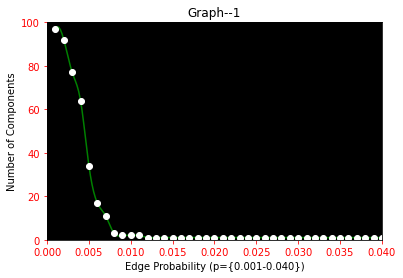

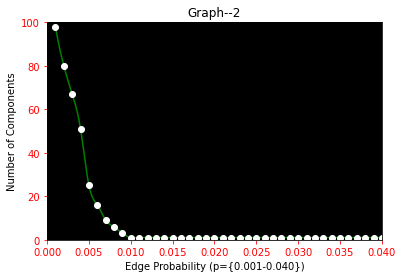

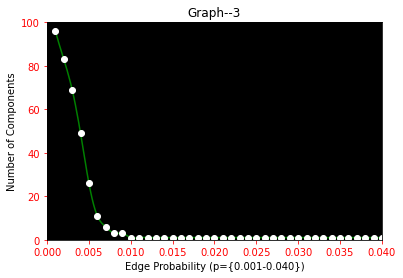

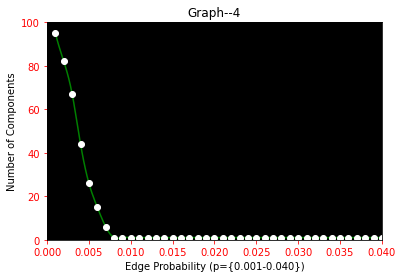

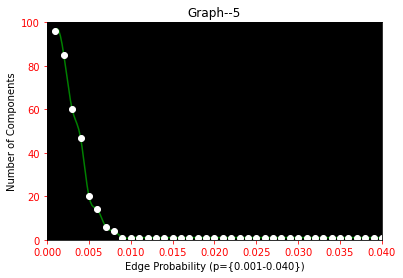

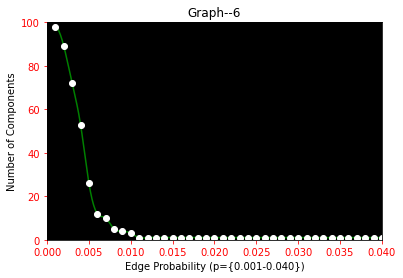

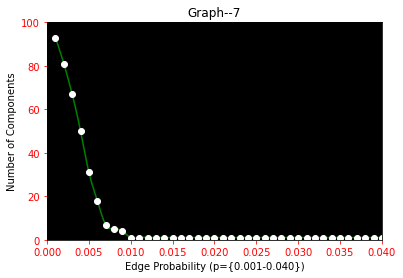

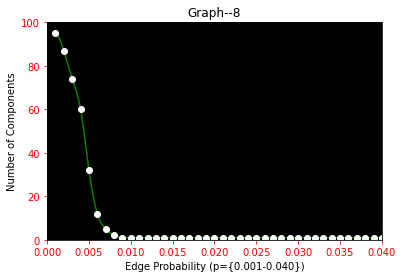

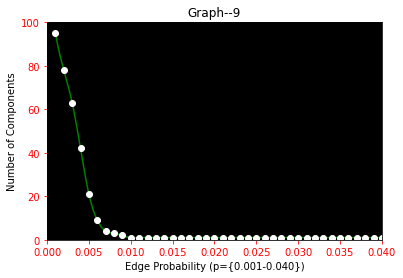

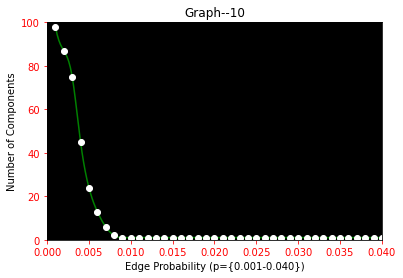

In [8]:
# Create different amount of different sized graphs up to either 
# specified size or randomnly between the minimum, 2, and max size 
# of the graphs you wanted generated.
amount_of_graphs = 10
max_size_of_graphs = 100
min_size_of_graphs = 2
set_size_of_graphs = max_size_of_graphs

list_of_graphs = []

# Iterate through and create instances of graph, then append them to a list of
# graphs to latter use for iterating through 'Graph' objects. 
for grph_indx in range(1, amount_of_graphs+1):
    temp_graph_obj = Graph(grph_nm=f"{grph_indx}")
    # Iterate through each probability between 1 and 0 for edge forming between 
    # two nodes.
    for edge_prob in temp_graph_obj.component_proba_dict.keys():
        # node_pair_set_list, amount_of_nodes = 
        # temp_graph_obj.genRandomListOfNodes(max=max_size_of_graphs, min=min_size_of_graphs)
        node_pair_set_list, amount_of_nodes = temp_graph_obj.genSetListOfNodes(set_size_of_graphs)        
        # For each pair we evaluate if we create an edge inbetween them
        for pair_nodes in node_pair_set_list:
            # Connect edges inbetween each node by selcting at random.
            create_edge_bool = temp_graph_obj.randomEdgeConnect(edge_prob)
            if create_edge_bool:
                temp_graph_obj.add_edge(pair_nodes[0],
                            pair_nodes[1],
                            weight=1)
               
        # Keep track of each graphs different probabilities components   
        temp_graph_obj.component_proba_dict.get(edge_prob)[0] = nx.number_connected_components(temp_graph_obj)

        # Keep track of each graphs different average node degree
        temp_graph_obj.component_proba_dict.get(edge_prob)[1] = temp_graph_obj.calculateAvgComponentDegree()
        
        # Show visualization of graph
        # temp_graph_obj.showGraph()

    list_of_graphs.append(temp_graph_obj)   
    
# Show line graph of plotted p values and number of different component in the x-axis
# and to the y-axis respectively.
for graph in list_of_graphs:
    # Create graph for components for each edge pobability and tne number of componenets
    # as the probabaility of edges forming goes up starting from 0 to 1 in 0.1 increments.
    xx = [proab_graph_var for proab_graph_var in graph.component_proba_dict.keys()] 
    yy = [num_componts[0] for num_componts in graph.component_proba_dict.values()] 
    # Create 'numpy' array to build regression model.
    x = np.array(xx)
    y = np.array(yy)
    # Using 'scipy'and 'numpy' to build regression model type.
    X_Y_Spline = make_interp_spline(x, y)
    X_= np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    # Set graph attributes
    ax = plt.axes()
    ax.set_title(graph.graph_name, c='black')
    ax.set_ylabel(f"Number of Components", c='black')
    ax.set_xlabel("Edge Probability (p={0.001-0.040})", c='black')
    ax.set_ylim(0, max_size_of_graphs)
    ax.set_xlim(0, 0.04)    
    ax.set_facecolor('black')
    ax.tick_params(axis='x', colors='red')
    ax.tick_params(axis='y', colors='red') 
    # Plot and show graphs 
    plt.plot(X_, Y_, 'g')
    plt.plot(xx, yy, 'wo')          
    plt.show(ax)
    


    

    


Observations: 

As we can see from the results above, on a very small scale, that the number of different components quickly decreases as the pobability of edges forming slowly grows.  This goes right along with the assumption we make for this class that eventually if there are either enough nodes and a high enough probability eventually connections will form in between all the exsisting componenets createing one fully connected graph.  In this observations we selected to look at 10 different graphs that each have 100 nodes.  We take each of the 10 graphs and then evaluate the number of components for each probability of the edge forming that exsists.  When first looking on the scale of 0.1 to 0.9 it was very clearly seen that the number of componenets dropped dramatically to eventually combing to one compononet beofre the probability even reached 0.2. So a closer look was taken between the range of 0.001 and 0.04.  AS we can see the number of componenets rops to within20 compononets even when the probability of an edge forming is still less than 1%.   


3) Thinking about local connectivity as a function of $p$. If $p = 0$, every node has $0$ neighbors (the degree of every node is $0$). If $p = 1$, every node has $n − 1$ neighbors (the _degree_ of every node is $n − 1$). In between, the average _degree_ of nodes increases. Your assignment is to explore the relationship between p and the average node degree on the network. Follow the
directions in Deliverable 3 precisely.
#### Delieverable 3:
Choose a fixed value of $n$ (ideally larger than 100). Create a plot which has average node degree on the vertical axis, and $p$ on the horizontal axis. For each value of $p$ that you study (you should check at least the values $p = 0.1, \ p = 0.2, \ p = 0.3, \ . \ . \ . \ ,  \ p = 0.9$), generate $10$ (or more) random graphs, compute the average node degree (the average number of neighbors over all nodes), and plot the average degree from each of those generated graphs. In addition, for each value of $p$, compute the _average_ (over all generated graphs) average node degree and plot that using a distinct color. You may use any technique you want to compute the average node degree.

Observations:

Here we played around with small values again to show quick and rapid convergineging and diverging relationship in the graphs attributes and found that taking a much closer look helped show where the average node degree would quickly grow as the probability of edges forming slowly grew.


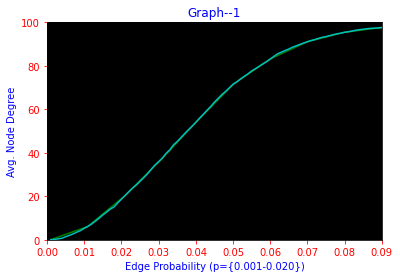

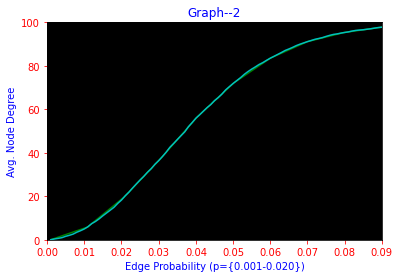

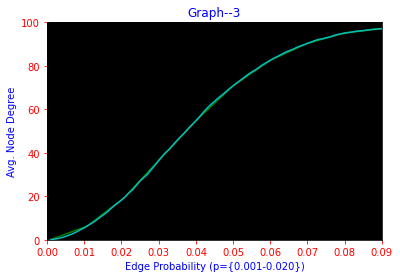

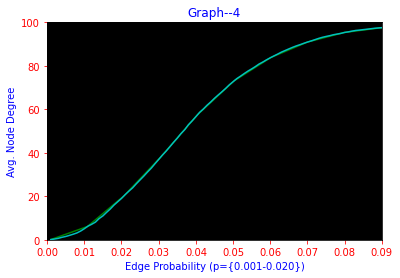

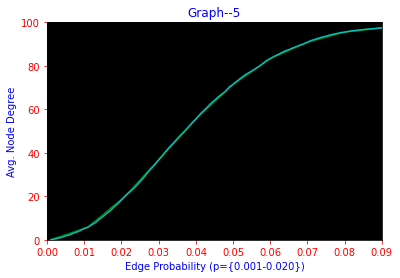

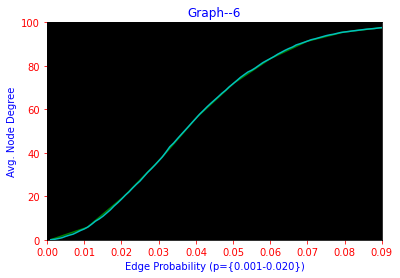

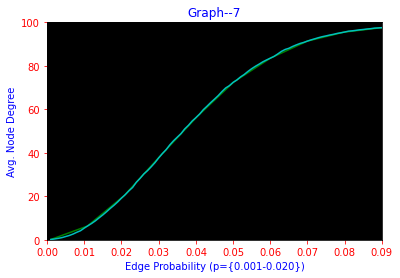

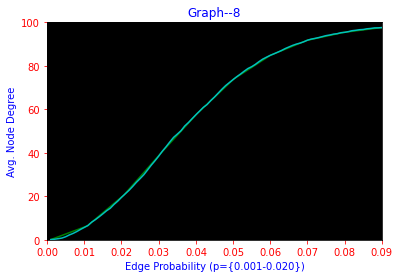

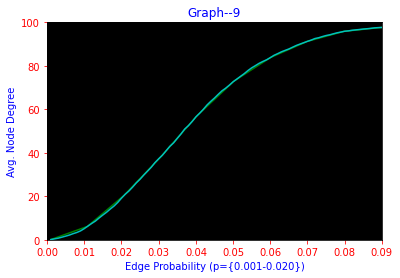

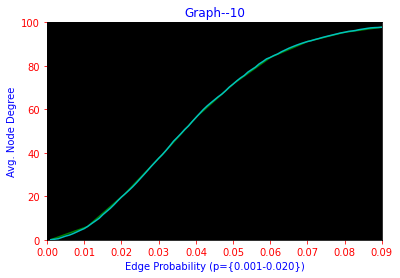

In [9]:
# Show line graph of plotted p values and number of different component 
# to the x-axis and to the y-axis respectively.
for graph in list_of_graphs:
    graph.calculateAvgComponentDegree()
    # Create graph for components for each edge pobability.
    xxx = [proab_graph_var for proab_graph_var in graph.component_proba_dict.keys()] 
    yyy = [num_components[1] for num_components in graph.component_proba_dict.values()] 
    xxxx = np.array(xxx)
    yyyy = np.array(yyy)
    X_Y_Spline = make_interp_spline(xxxx, yyyy)
    XX_= np.linspace(xxxx.min(), yyyy.max(), 10000)
    YY_ = X_Y_Spline(XX_)
    ax = plt.axes()
    # # ax.text(1, 1, f"Edge Proabability: {edge_prob}", c='white')  
    ax.set_title(graph.graph_name, c='blue')
    ax.set_ylabel(f"Avg. Node Degree", c='blue')
    ax.set_ylim(0, nx.number_of_nodes(graph))
    ax.set_xlabel("Edge Probability (p={0.001-0.020})", c='blue')
    ax.set_xlim(0, 0.09)
    ax.set_facecolor('black')
    ax.tick_params(axis='x', colors='red')
    ax.tick_params(axis='y', colors='red') 
    plt.plot(XX_, YY_, 'g')
    plt.plot(xxx, yyy, 'c')          
    plt.show(ax)

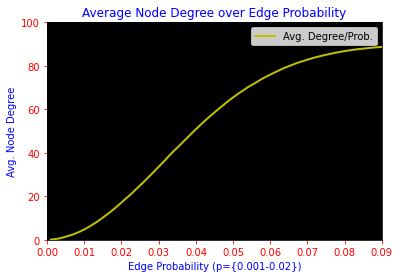

In [10]:
# List of overall averages saved for each instance of graph stroed in their own
# dictionary.

x_dgr_lst =  [proab_graph_var for proab_graph_var in graph.component_proba_dict.keys()]
y_dgr_lst = [] 

# Iterate through graph variations.
for prob_var in graph.component_proba_dict.keys():
    # Reset 'avg. node degree' acumaltor.
    gen_graph_dgr_acum = 0
    for graph in list_of_graphs:
        # Acumalate avg. node degree values.
        gen_graph_dgr_acum += graph.component_proba_dict.get(prob_var)[1]
    # Exit for loop and find avg node degree amonsgt different
    # variation of graphs (different edge probabilty).
    gen_graph_dgr_acum /= 11
    # Add to list to plot on graph.
    y_dgr_lst.append(gen_graph_dgr_acum)
    
x_avg = np.array(x_dgr_lst)
y_avg = np.array(y_dgr_lst)
ax = plt.axes()
# # ax.text(1, 1, f"Edge Proabability: {edge_prob}", c='white')  
ax.set_title("Average Node Degree over Edge Probability", c='blue')
ax.set_ylabel(f"Avg. Node Degree", c='blue')
ax.set_ylim(0, 100)
ax.set_xlabel("Edge Probability (p={0.001-0.02})", c='blue')
ax.set_xlim(0, 0.09)
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red') 
lines = plt.plot(x_avg, y_avg, 'y')   
plt.setp(lines[0], linewidth=2)
plt.legend(('Avg. Degree/Prob.', 'Somethin'), loc='upper right')
plt.show(ax)


Observations:

As we can see from the average of all the genorated graphs, the avg. node degree would quickly go up in degree as the edge probability slowly went up.  